## Burgers' equation

Burgers' equation is a fundamental partial differential equation occurring in various areas of applied mathematics, such as fluid mechanics, nonlinear acoustics, gas dynamics, and traffic flow.

$u_t + u\cdot u_x = ν \cdot u_{xx}$, where $\nu$ is a *kinematic viscosity*

### Numerical Solution:

![Screenshot 2021-10-26 at 09-08-25 Solving one- and two-dimensional unsteady Burgers' equation using fully implicit finite d[...].png](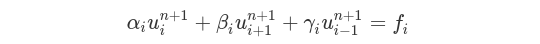)\
where\
![Screenshot 2021-10-26 at 09-09-13 Solving one- and two-dimensional unsteady Burgers' equation using fully implicit finite d[...].png](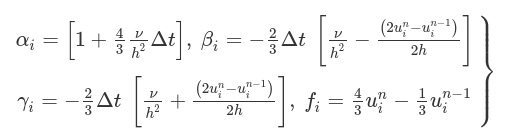)

Solved efficiently by Thomas algorithm

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm

In [ ]:
#@title
Nx = 400
M = 400
T = 40
nu = [0.01, 0.005, 0.001, 0.0007]
x = np.linspace(0,1,Nx)
t = np.linspace(0,T,M)
h = x[1]-x[0]
tau = t[1]-t[0]
gamma = nu / h**2
u = np.zeros((4,Nx,M))

In [ ]:
#@title
#initial condition
for NU in range (len(nu)):
  for i in range(Nx):
    u[NU,i,0] = np.sin(np.pi*(i*h))
#boundary conditions
for NU in range (len(nu)):
  for k in range(M):
    u[NU,0,k] = 0
    u[NU,-1,k] = 0

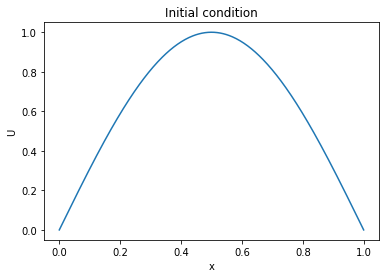

In [ ]:
#@title
plt.plot(x, u[0,:,0])
plt.title('Initial condition')
plt.xlabel('x')
plt.ylabel('U')
plt.show()

In [ ]:
#@title
NU = int()
def get_A(NU,i,n,gamma=gamma[NU],tau=tau,h=h,u=u):
  return -2/3*tau*(gamma+(2*u[NU,i,n]-u[NU,i,n-1])/(2*h))
B = -(1+4/3*gamma*tau)
def get_C(NU,i,n,gamma=gamma[NU],tau=tau,h=h,u=u):
  return -2/3*tau*(gamma-(2*u[NU,i,n]-u[NU,i,n-1])/(2*h))
def get_F(NU,i,n,gamma=gamma[NU],tau=tau,h=h,u=u):
  return 4/3*u[NU,i,n]-1/3*u[NU,i,n-1]

def get_d(NU,i,n,d,A=get_A,B=B[NU],C=get_C):
    return C(NU,i,n) / (B - A(NU,i,n) * d[i])
def get_sigma(NU,i,n,d,sigma,A=get_A,B=B[NU],F=get_F):
    return (F(NU,i,n)-A(NU,i,n)*sigma[i])/(A(NU,i,n)*d[i]-B)

def thomas_alg(NU,n):
  d = np.zeros(Nx)
  sigma = np.zeros(Nx)
  d[0] = 0
  sigma[0] = 0
  for i in range(1,Nx):
    # A = get_A(i,n)
    # C = get_C(i,n)
    # F = get_F(i,n)
    d[i] = get_d(NU,i-1,n-1,d)
    sigma[i] = get_sigma(NU,i-1,n-1,d,sigma)
  for i in range(Nx-2,0,-1):
    u[NU,i,n] = d[i+1] * u[NU,i+1,n] + sigma[i+1]

In [ ]:
#@title
for NU in range(len(nu)):
  for i in range(1,Nx-1):
    u[NU,i,1] = u[NU,i,0] + tau*(nu[NU] * (u[NU,i-1,0]-2*u[NU,i,0]+u[NU,i+1,0])/h**2 - u[NU,i,0] * (u[NU,i+1,0]-u[NU,i-1,0])/(2*h) )
  for n in tqdm.tqdm_notebook(range(2,M)):
    thomas_alg(NU,n)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/398 [00:00<?, ?it/s]

  0%|          | 0/398 [00:00<?, ?it/s]

  0%|          | 0/398 [00:00<?, ?it/s]

  0%|          | 0/398 [00:00<?, ?it/s]

### Analitical solution

The exact solution was given by Cole Hopf:
![Screenshot 2021-10-26 at 02-01-30 Solving one- and two-dimensional unsteady Burgers' equation using fully implicit finite d[...].png](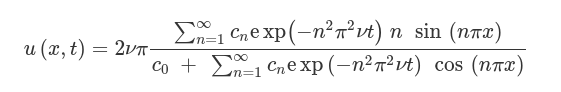)
where the Fourier coefficients are 
![Screenshot 2021-10-26 at 02-01-55 Solving one- and two-dimensional unsteady Burgers' equation using fully implicit finite d[...].png](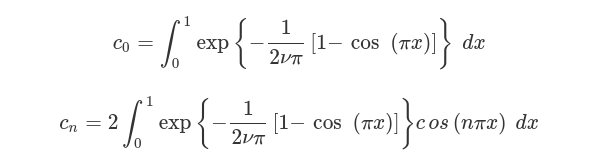)

In [ ]:
#@title
from scipy.special import iv
import scipy.integrate as integrate

In [ ]:
#@title
Time=np.zeros((len(nu),3))
Time[0]=[8,10,12]
Time[1]=[10,15,20]
Time[2]=[20,30,40]
Time[3]=Time[2]

In [ ]:
#@title
Nx_an = Nx
U_an = np.zeros((4,3,Nx_an))
x_an = np.linspace(0,1,Nx_an)
h_an = x_an[1]-x_an[0]
def Co(nu=nu[NU]):
  return integrate.quad(lambda x: np.exp(-1/(2*nu*np.pi)*(1-np.cos(np.pi*x) ) ),0,1)[0]

def get_Cn(n,nu=nu[NU]):
  return 2*(integrate.quad(lambda x: np.exp(-1/(2*nu*np.pi)*(1-np.cos(np.pi*x) ) ) * np.cos(n*np.pi*x),0,1)[0])

def sum1(x,t,N,Cn=get_Cn,nu=nu[NU]):
  total=0
  for n in range(1,N):
    total+=Cn(n)*np.exp(-n**2 *np.pi**2 * nu * t) * n * np.sin(n * np.pi * x)
  return total

def sum2(x,t,N,Cn=get_Cn,nu=nu[NU]):
  total=0
  for n in range(1,N):
    total+=Cn(n)*np.exp(-n**2 *np.pi**2 * nu * t) * np.cos(n * np.pi * x)
  return total

def get_U_an(x,t,nu=nu[NU]):
  return 2*nu*np.pi*sum1(x,t,10)/(Co() + sum2(x,t,10))
  

In [ ]:
#@title
h_an

0.002506265664160401

In [ ]:
#@title
for NU in range(len(nu)):
  for j in range(3):
    for i in tqdm.notebook.tqdm(range(Nx_an)):
      U_an[NU,j,i]=get_U_an(i*h_an,Time[NU,j])

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

### Comparison of analitical and numerical solutions

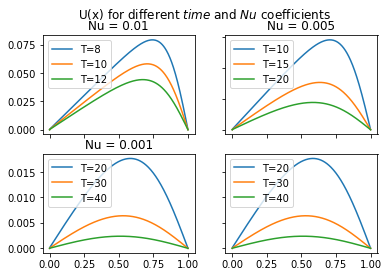

In [ ]:
#@title
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('U(x) for different $time$ and $Nu$ coefficients')
ax1.plot(x,u[0,:,round(8//tau)],label='T=8')
ax1.plot(x,u[0,:,round(10//tau)],label='T=10')
ax1.plot(x,u[0,:,round(12//tau)],label='T=12')
# ax1.plot(x,U_an[0,0],'--')
# ax1.plot(x,U_an[0,1],'--')
# ax1.plot(x,U_an[0,2],'--')
ax1.set_title(f'Nu = {nu[0]}')
ax1.legend()

ax2.plot(x,u[1,:,round(10//tau)],label='T=10')
ax2.plot(x,u[1,:,round(15//tau)],label='T=15')
ax2.plot(x,u[1,:,round(20//tau)],label='T=20')
# ax2.plot(x,U_an[1,0],'--')
# ax2.plot(x,U_an[1,1],'--')
# ax2.plot(x,U_an[1,2],'--')
ax2.set_title(f'Nu = {nu[1]}')
ax2.legend()

ax3.plot(x,u[2,:,round(20//tau)],label='T=20')
ax3.plot(x,u[2,:,round(30//tau)],label='T=30')
ax3.plot(x,u[2,:,round(40//tau)],label='T=40')
# ax3.plot(x,U_an[2,0],'--')
# ax3.plot(x,U_an[2,1],'--')
# ax3.plot(x,U_an[2,2],'--')
ax3.set_title(f'Nu = {nu[2]}')
ax3.legend()

ax4.plot(x,u[3,:,round(20//tau)],label='T=20')
ax4.plot(x,u[3,:,round(30//tau)],label='T=30')
ax4.plot(x,u[3,:,round(40//tau)],label='T=40')
# ax4.plot(x,U_an[3,0],'--')
# ax4.plot(x,U_an[3,1],'--')
# ax4.plot(x,U_an[3,2],'--')
#ax4.set_title(f'Nu = {nu[3]}')
ax4.legend()

for ax in fig.get_axes():
    ax.label_outer()


In [ ]:
#@title
# plt.plot(x,u[:,-1],label='T=12, numerical')
# plt.plot(x,U_an[2],'--',label='T=12, analitical')
# plt.plot(x,u[:,round((M-1)*8/12)],label='T=8, numerical')
# plt.plot(x,U_an[1],'--',label='T=10, analitical')
# plt.plot(x,u[:,round((M-1)*10/12)],label='T=10, numerical')
# plt.plot(x,U_an[0],'--',label='T=8, analitical')
# plt.ylabel('u')
# plt.xlabel('x')
# plt.legend()
# plt.show()

In [ ]:
#@title
Error = np.zeros((4,3,Nx))
for NU in range(len(nu)):
  for j in range(3):
    for i in range(1,Nx-1):
      Error[NU,j,i]=abs(U_an[NU,j,i]-u[NU,i,round(Time[NU,j]/T*M)-1])/U_an[NU,j,i]*100

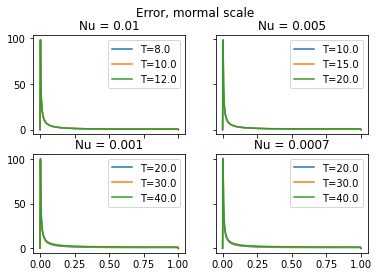

In [ ]:
#@title
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Error, mormal scale')
ax1.plot(x,Error[0,0],label=f'T={Time[0,0]}')
ax1.plot(x,Error[0,1],label=f'T={Time[0,1]}')
ax1.plot(x,Error[0,2],label=f'T={Time[0,2]}')
ax1.set_title(f'Nu = {nu[0]}')
ax1.legend()

ax2.plot(x,Error[1,0],label=f'T={Time[1,0]}')
ax2.plot(x,Error[1,1],label=f'T={Time[1,1]}')
ax2.plot(x,Error[1,2],label=f'T={Time[1,2]}')
ax2.set_title(f'Nu = {nu[1]}')
ax2.legend()

ax3.plot(x,Error[2,0],label=f'T={Time[2,0]}')
ax3.plot(x,Error[2,1],label=f'T={Time[2,1]}')
ax3.plot(x,Error[2,2],label=f'T={Time[2,2]}')
ax3.set_title(f'Nu = {nu[2]}')
ax3.legend()

ax4.plot(x,Error[3,0],label=f'T={Time[3,0]}')
ax4.plot(x,Error[3,1],label=f'T={Time[3,1]}')
ax4.plot(x,Error[3,2],label=f'T={Time[3,2]}')
ax4.set_title(f'Nu = {nu[3]}')
ax4.legend()

for ax in fig.get_axes():
    ax.label_outer()

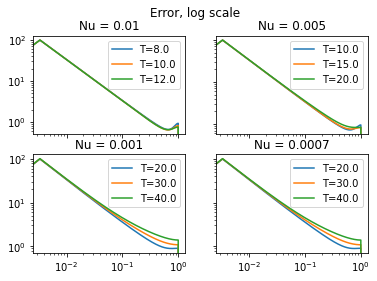

In [ ]:
#@title
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Error, log scale')
ax1.plot(x,Error[0,0],label=f'T={Time[0,0]}')
ax1.plot(x,Error[0,1],label=f'T={Time[0,1]}')
ax1.plot(x,Error[0,2],label=f'T={Time[0,2]}')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title(f'Nu = {nu[0]}')
ax1.legend()

ax2.plot(x,Error[1,0],label=f'T={Time[1,0]}')
ax2.plot(x,Error[1,1],label=f'T={Time[1,1]}')
ax2.plot(x,Error[1,2],label=f'T={Time[1,2]}')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title(f'Nu = {nu[1]}')
ax2.legend()

ax3.plot(x,Error[2,0],label=f'T={Time[2,0]}')
ax3.plot(x,Error[2,1],label=f'T={Time[2,1]}')
ax3.plot(x,Error[2,2],label=f'T={Time[2,2]}')
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_title(f'Nu = {nu[2]}')
ax3.legend()

ax4.plot(x,Error[3,0],label=f'T={Time[3,0]}')
ax4.plot(x,Error[3,1],label=f'T={Time[3,1]}')
ax4.plot(x,Error[3,2],label=f'T={Time[3,2]}')
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_title(f'Nu = {nu[3]}')
ax4.legend()

for ax in fig.get_axes():
    ax.label_outer()

In [ ]:
#@title
RMSE=np.zeros((4,3))
RRMSE=np.zeros((4,3))
R2=np.zeros((4,3))
for NU in range(len(nu)):
  for j in range(3):
    for i in range(1,Nx-1):
      RMSE[NU,j] += (U_an[NU,j,i] - u[NU,i,round(Time[NU,j]/T*M)-1])**2
      RRMSE[NU,j]+= (U_an[NU,j,i] - np.mean(U_an[NU,j,:]) )**2
    RMSE[NU,j] = np.sqrt(RMSE[NU,j]/Nx)
    RRMSE[NU,j] = np.sqrt(RRMSE[NU,j]/Nx)
    RRMSE[NU,j] = RMSE[NU,j]/RRMSE[NU,j]
    R2[NU,j] = 1 - RRMSE[NU,j]**2
    #print(f"RMSE for nu={nu[NU]}, T={Time[NU,j]} is: ",RMSE[NU,j])
    print(f"  R^2 for nu={nu[NU]}, T={Time[NU,j]} is: ",round(R2[NU,j],7))

  R^2 for nu=0.01, T=8.0 is:  0.999673
  R^2 for nu=0.01, T=10.0 is:  0.9996736
  R^2 for nu=0.01, T=12.0 is:  0.9996507
  R^2 for nu=0.005, T=10.0 is:  0.9996099
  R^2 for nu=0.005, T=15.0 is:  0.9995294
  R^2 for nu=0.005, T=20.0 is:  0.9993607
  R^2 for nu=0.001, T=20.0 is:  0.9993073
  R^2 for nu=0.001, T=30.0 is:  0.9987779
  R^2 for nu=0.001, T=40.0 is:  0.9980613
  R^2 for nu=0.0007, T=20.0 is:  0.9993033
  R^2 for nu=0.0007, T=30.0 is:  0.9987725
  R^2 for nu=0.0007, T=40.0 is:  0.9980544


##Inviscid Burgers' equation
$u_t + u\cdot u_x = 0$\
$u_x=\dfrac{u_0'}{1+u'_0t}$, where $u_0$ is the initial value of $u$\
if $u'_0(x) > 0$ at some point then with time wave speed of the profile diminishes in time because $1 + u'_0t > 0$ rises with time.This means that profile of the wave **flattens** as time passes.\
On the other hand, if we assume u′0(x) < 0 at some point, then ux increases in time,
since $1 + u'_0t \rightarrow 0, u_x \rightarrow \infty$ at some point in time.Therefore, wave
profile **steepens** after a period of time.

*If the propagation velocity of the wave $u_x$ is a decreasing function of x, the wave eventually "breaks" and gives multiple valued solutions.*\
$t_B=-\dfrac{1}{\min u'_{0}(x)}=1$ for $u_0=\sin(x)$

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm

In [ ]:
#@title
M = 800
h = 0.0210
tau = 0.0420
N = round(2*np.pi/h)
x = np.linspace(0,2*np.pi, N )
t = np.linspace(0, M*tau , M )

u = np.zeros((N,M))

In [ ]:
#@title
#initial condition:
for j in range(N):
  u[j,0]=np.sin(j*h)
#boundary condition:
for n in range(M):
  u[0,n] = 0
  u[-1,n] = 0

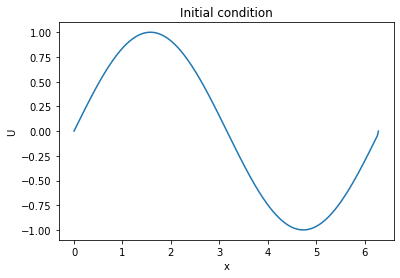

In [ ]:
#@title
plt.plot(x,u[:,0])
plt.title("Initial condition")
plt.xlabel('x')
plt.ylabel('U')
plt.show()

In [ ]:
#@title
def F(j,n,u=u):
  return u[j,n]**2 /2

### 1.Upwind scheme
$u_j^{n+1}=u_j^{n}-\dfrac{\Delta t}{\Delta x}\left ( F(u_{j+1}^{n}) - F(u_j^{n}) \right )$ if $u>0$ and\
$u_j^{n+1}=u_j^{n}-\dfrac{\Delta t}{\Delta x}\left ( F(u_{j}^{n}) - F(u_{j-1}^{n}) \right )$ if $u<0$

In [ ]:
#@title
def get_u_up(j,n,u=u,h=h,tau=tau):
  if u[j,n] >0:
    return u[j,n] - tau/h * ( F(j+1,n,u) - F(j,n,u) )
  else:
    return u[j,n] - tau/h * ( F(j,n,u) - F(j-1,n,u) )
def get_u_up2(j,n,u=u,h=h,tau=tau):
    return u[j,n] - 0.5*tau/h * ( F(j,n,u)**2 - F(j-1,n,u)**2 )

In [ ]:
#@title
for n in range(1,M):
  for j in range(1,N-1):
    u[j,n] = get_u_up(j,n-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


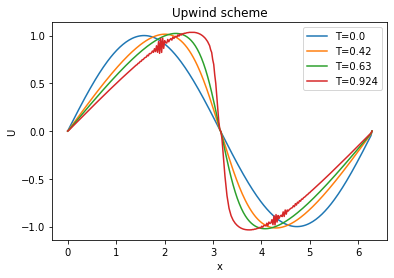

In [ ]:
#@title
plt.plot(x,u[:,0],label=f'T={round(tau*0,3)}')
plt.plot(x,u[:,10],label=f'T={round(tau*10,3)}')
plt.plot(x,u[:,15],label=f'T={round(tau*15,3)}')
plt.plot(x,u[:,22],label=f'T={round(tau*22,3)}')
plt.title('Upwind scheme')
plt.xlabel('x')
plt.ylabel('U')
plt.legend()
plt.show()

### 2.Second order Lax-Friedrichs Scheme
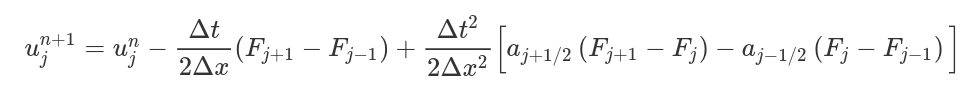
where\
 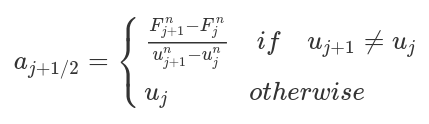

In [ ]:
#@title
def get_a(j,n):
  if u[j+1,n] != u[j,n]:
    return ( F(j+1,n) - F(j,n) ) / ( u[j+1,n] - u[j,n] )
  else:
    return u[j,n]
def get_u_lf_2(j,n,u=u,h=h,tau=tau,a = get_a, F = F):
  gamma1 = tau/(2*h)
  gamma2 = tau**2/(2* h**2)
  return u[j,n] - gamma1 * (F(j+1,n) - F(j-1,n) ) + gamma2 * (a(j,n) * ( F(j+1,n)-F(j,n) ) - a(j-1,n) * ( F(j,n) - F(j-1,n) ) )

In [ ]:
#@title
for n in range(1,M):
  for j in range(1,N-1):
    u[j,n] = get_u_lf_2(j,n-1)

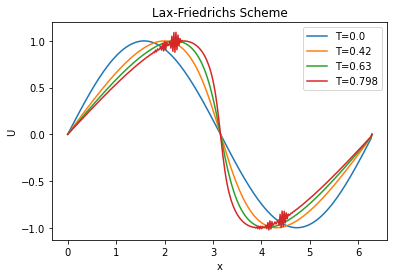

In [ ]:
#@title
plt.plot(x,u[:,0],label=f'T={round(tau*0,3)}')
plt.plot(x,u[:,10],label=f'T={round(tau*10,3)}')
plt.plot(x,u[:,15],label=f'T={round(tau*15,3)}')
plt.plot(x,u[:,19],label=f'T={round(tau*19,3)}')
plt.title('Lax-Friedrichs Scheme')
plt.xlabel('x')
plt.ylabel('U')
plt.legend()
plt.show()

### Godunov Scheme
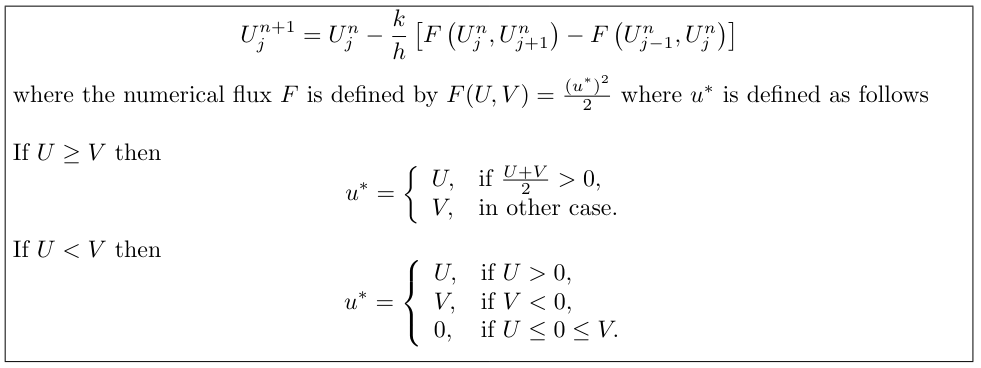

In [ ]:
#@title
def F_god( u, v ):
  ustar=np.zeros(len(u))
  for i in range(len(u) ):
    if u[i] >= v[i]:
      if ((u[i]+v[i])/2 > 0):
        ustar[i]=u[i]
      else:
        ustar[i]=v[i]
    else:
      if u[i]>0:
        ustar[i]=u[i]
      elif v[i]<0:
        ustar[i]=v[i]
      else:
        ustar[i]=0
  return 0.5 * ustar**2

In [ ]:
#@title
for n in range(M-1):
  u[1:-1,n+1] =u[1:-1,n]- tau/h*(F_god(u[1:-1,n],u[2:,n]) - F_god(u[:-2,n],u[1:-1,n]) )

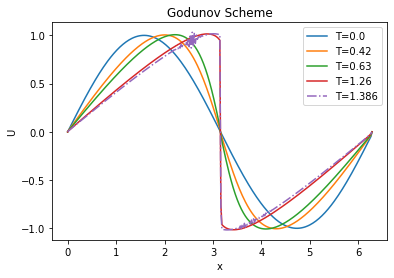

In [ ]:
#@title
plt.plot(x,u[:,0],label=f'T={round(tau*0,3)}')
plt.plot(x,u[:,10],label=f'T={round(tau*10,3)}')
plt.plot(x,u[:,15],label=f'T={round(tau*15,3)}')
plt.plot(x,u[:,30],label=f'T={round(tau*30,3)}')
plt.plot(x,u[:,33],'-.',label=f'T={round(tau*33,3)}')
plt.title("Godunov Scheme")
plt.xlabel('x')
plt.ylabel('U')
plt.legend()
plt.show()

### Shockwave showcase

In [488]:
#@title
M = 800
h = 0.0210
tau = 0.0420
N = round(1/h)
x = np.linspace(0,1, N )
t = np.linspace(0, M*tau , M )

u = np.zeros((N,M))

In [489]:
#@title
#initial condition
for j in range(N):
  u[j,0] = 1-round(j*h)
#u[(N+1)//2,0]=0.5
#boundary conditions
for n in range(M):
  u[0,n] = 1
  u[-1,n] = 0

#### Godunov Scheme

In [490]:
#@title
for n in range(M-1):
  u[1:-1,n+1] =u[1:-1,n]- tau/h*(F_god(u[1:-1,n],u[2:,n]) - F_god(u[:-2,n],u[1:-1,n]) )

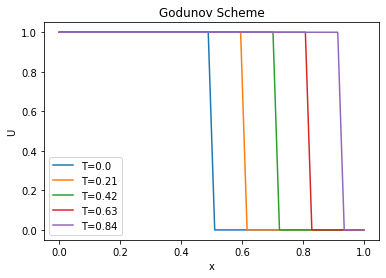

In [491]:
#@title
plt.plot(x,u[:,0],label=f'T={round(tau*0,3)}')
plt.plot(x,u[:,5],label=f'T={round(tau*5,3)}')
plt.plot(x,u[:,10],label=f'T={round(tau*10,3)}')
plt.plot(x,u[:,15],label=f'T={round(tau*15,3)}')
plt.plot(x,u[:,20],label=f'T={round(tau*20,3)}')
plt.legend()
plt.title("Godunov Scheme")
plt.xlabel('x')
plt.ylabel('U')
plt.show()

In [498]:
#@title
M = 800
h = 0.0013378
tau = 0.006689
N = round(1/h)
x = np.linspace(0,1, N )
t = np.linspace(0, M*tau , M )

u = np.zeros((N,M))

#### Conservative Up-wind scheme

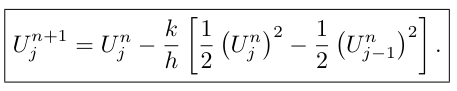

In [ ]:
#@title
for n in range(1,M):
  for j in range(1,N-1):
    u[j,n] = get_u_up2(j,n-1,u)

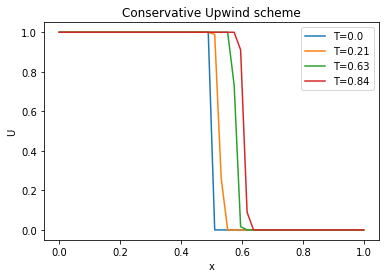

In [ ]:
#@title
plt.plot(x,u[:,0],label=f'T={round(tau*0,3)}')
plt.plot(x,u[:,5],label=f'T={round(tau*5,3)}')
plt.plot(x,u[:,15],label=f'T={round(tau*15,3)}')
plt.plot(x,u[:,20],label=f'T={round(tau*20,3)}')
plt.title('Conservative Upwind scheme')
plt.xlabel('x')
plt.ylabel('U')
plt.legend()
plt.show()

### Rarefaction wave

In [502]:
#@title
M = 800
h = 0.0210
tau = 0.0420
N = round(2/h)
x = np.linspace(0,2, N )
t = np.linspace(0, M*tau , M )

u = np.zeros((N,M))

In [503]:
#@title
#initial condition
for j in range(N):
  if j*h<0.5:
    u[j,0] = 0
  else:
    u[j,0] = 1
#boundary conditions
for n in range(M):
  u[0,n] = 0
  u[-1,n] = 1

#### Godunov Scheme

In [504]:
#@title
for n in range(M-1):
  u[1:-1,n+1] =u[1:-1,n]- tau/h*(F_god(u[1:-1,n],u[2:,n]) - F_god(u[:-2,n],u[1:-1,n]) )

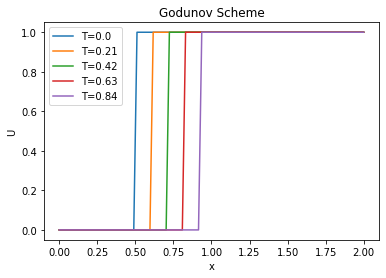

In [505]:
#@title
plt.plot(x,u[:,0],label=f'T={round(tau*0,3)}')
plt.plot(x,u[:,5],label=f'T={round(tau*5,3)}')
plt.plot(x,u[:,10],label=f'T={round(tau*10,3)}')
plt.plot(x,u[:,15],label=f'T={round(tau*15,3)}')
plt.plot(x,u[:,20],label=f'T={round(tau*20,3)}')
plt.legend()
plt.title("Godunov Scheme")
plt.xlabel('x')
plt.ylabel('U')
plt.show()

#### Conservative Up-wind scheme

In [507]:
#@title
for n in range(1,M):
  for j in range(1,N-1):
    u[j,n] = get_u_up2(j,n-1,u)

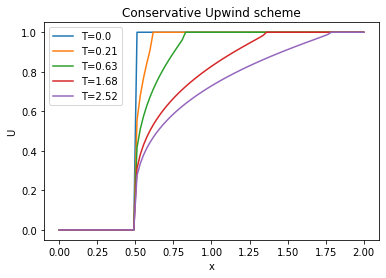

In [508]:
#@title
plt.plot(x,u[:,0],label=f'T={round(tau*0,3)}')
plt.plot(x,u[:,5],label=f'T={round(tau*5,3)}')
plt.plot(x,u[:,15],label=f'T={round(tau*15,3)}')
plt.plot(x,u[:,40],label=f'T={round(tau*40,3)}')
plt.plot(x,u[:,60],label=f'T={round(tau*60,3)}')
plt.title('Conservative Upwind scheme')
plt.xlabel('x')
plt.ylabel('U')
plt.legend()
plt.show()

### Third example


In [510]:
#@title
M = 800
h = 0.0210
tau = 0.0420
N = round(2*np.pi/h)
x = np.linspace(0,2*np.pi, N )
t = np.linspace(0, M*tau , M )

u = np.zeros((N,M))

In [511]:
#@title
#initial condition:
for j in range(N):
  if j*h<=np.pi:
    u[j,0]=np.sin(j*h)
  else: u[j,0]=0
#boundary condition:
for n in range(M):
  u[0,n] = 0
  u[-1,n] = 0

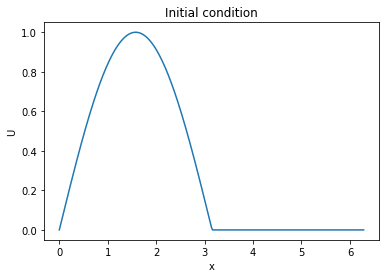

In [512]:
#@title
plt.plot(x,u[:,0])
plt.title("Initial condition")
plt.xlabel('x')
plt.ylabel('U')
plt.show()

####Godunov Scheme

In [519]:
#@title
for n in range(M-1):
  u[1:-1,n+1] =u[1:-1,n]- tau/h*(F_god(u[1:-1,n],u[2:,n]) - F_god(u[:-2,n],u[1:-1,n]) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  


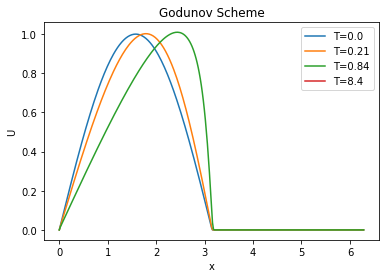

In [529]:
#@title
plt.plot(x,u[:,0],label=f'T={round(tau*0,3)}')
plt.plot(x,u[:,5],label=f'T={round(tau*5,3)}')
plt.plot(x,u[:,20],label=f'T={round(tau*20,3)}')
plt.plot(x,u[:,200],label=f'T={round(tau*200,3)}')
plt.legend()
plt.title("Godunov Scheme")
plt.xlabel('x')
plt.ylabel('U')
plt.show()

In [513]:
#@title
for n in range(1,M):
  for j in range(1,N-1):
    u[j,n] = get_u_up2(j,n-1,u)

#### Conservative Upwind scheme

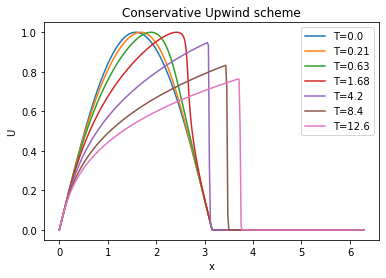

In [518]:
#@title
plt.plot(x,u[:,0],label=f'T={round(tau*0,3)}')
plt.plot(x,u[:,5],label=f'T={round(tau*5,3)}')
plt.plot(x,u[:,15],label=f'T={round(tau*15,3)}')
plt.plot(x,u[:,40],label=f'T={round(tau*40,3)}')
plt.plot(x,u[:,100],label=f'T={round(tau*100,3)}')
plt.plot(x,u[:,200],label=f'T={round(tau*200,3)}')
plt.plot(x,u[:,300],label=f'T={round(tau*300,3)}')
plt.title('Conservative Upwind scheme')
plt.xlabel('x')
plt.ylabel('U')
plt.legend()
plt.show()

### References:


1. Burgers equation by Mikel Landajuela
2. Solving one- and two-dimensional unsteady Burgers' equation using fully implicit finite difference schemes by N. A. Mohamed
3. INVISCID BURGERS EQUATIONS AND ITS NUMERICAL SOLUTIONS by NAZMI OYAR